# ( Ford GoBike System Data )
### by ( Nourah Hasan )

## Preliminary Wrangling

> Ford GoBike is the Bay Area's bike share system, with thousands of bikes at hundreds of station in San Francisco, San Jose and the East Bay.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [3]:
df_ford = pd.read_csv('201902-fordgobike-tripdata.csv')
df_ford.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [4]:
# overview of data shape and composition
print(df_ford.shape)
print(df_ford.dtypes)
df_ford.sample(10)

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
29989,178,2019-02-24 23:42:27.2120,2019-02-24 23:45:26.1490,109.0,17th St at Valencia St,37.763316,-122.421904,133.0,Valencia St at 22nd St,37.755213,-122.420975,5007,Subscriber,1980.0,Male,No
32825,2167,2019-02-24 13:00:15.9750,2019-02-24 13:36:23.8960,196.0,Grand Ave at Perkins St,37.808894,-122.256460,372.0,Madison St at 17th St,37.804037,-122.262409,6379,Customer,1979.0,Male,No
165820,329,2019-02-04 22:02:10.3170,2019-02-04 22:07:39.3340,323.0,Broadway at Kearny,37.798014,-122.405950,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,4773,Customer,1996.0,Female,No
96462,349,2019-02-15 10:25:29.5220,2019-02-15 10:31:18.9880,134.0,Valencia St at 24th St,37.752428,-122.420628,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,707,Subscriber,1988.0,Male,No
156130,344,2019-02-06 08:17:16.8110,2019-02-06 08:23:01.0920,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,89.0,Division St at Potrero Ave,37.769218,-122.407646,5444,Subscriber,1986.0,Male,No
117733,1051,2019-02-11 20:20:13.2940,2019-02-11 20:37:44.4290,31.0,Raymond Kimbell Playground,37.783813,-122.434559,19.0,Post St at Kearny St,37.788975,-122.403452,3653,Subscriber,1992.0,Male,No
155758,528,2019-02-06 08:32:37.9160,2019-02-06 08:41:26.6500,115.0,Jackson Playground,37.765026,-122.398773,124.0,19th St at Florida St,37.760447,-122.410807,1615,Subscriber,1986.0,Male,No
7533,905,2019-02-28 08:52:27.9410,2019-02-28 09:07:33.3320,107.0,17th St at Dolores St,37.763015,-122.426497,321.0,5th St at Folsom,37.780146,-122.403071,5945,Subscriber,1965.0,Male,No
3765,110,2019-02-28 17:03:54.0790,2019-02-28 17:05:44.4340,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,104.0,4th St at 16th St,37.767045,-122.390833,6077,Subscriber,1985.0,Female,No
126543,285,2019-02-10 18:29:37.3260,2019-02-10 18:34:22.5740,251.0,California St at University Ave,37.870555,-122.279720,245.0,Downtown Berkeley BART,37.870139,-122.268422,4869,Subscriber,NaN,NaN,No


In [5]:
# descriptive statistics for numeric variables
df_ford.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
df_ford.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
df_ford

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


### What is the structure of your dataset?

> There are (183412) bike rides in the dataset and 16 features divided into :
1- bike informations : bike_id ,bike_share_for_all_trip
2- member informations : member_birth_year , member_gender , user_type
4- duration of trip by seconds :duration_sec
6- time of trips : start_time , end_time 
8- station informations :(start_station_id ,start_station_name) , (end_station_id , end_station_name )
9- station coordinates :(start_station_latitude , start_station_longitude) , (end_station_latitude , end_station_longitude)

### What is/are the main feature(s) of interest in your dataset?

>  I am interested in How the features of members like Birth year , Gender and Type of user 
>  effected on the number of times they rides the Bike , AND 
>  effected on the length of duration trip  , AND 
>  How the distance of the trip effect on counts of the times rides bike

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> 
- for member features :( member_birth_year, member_gender, user_type, bike_share_for_all_trip)
- for length of duration trip : (duration_sec)
- for counts of times rides bike : (start_time , end_time)
- for the distance of trip :
 *  distance between start, end station coordinates :(start_station_latitude , start_station_longitude) , (end_station_latitude , end_station_longitude)

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [8]:
df_ford.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
81660,829,2019-02-18 12:30:32.3590,2019-02-18 12:44:21.9340,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,285.0,Webster St at O'Farrell St,37.783521,-122.431158,4911,Customer,1984.0,Female,No
117640,494,2019-02-11 20:47:53.0260,2019-02-11 20:56:07.1650,121.0,Mission Playground,37.759210,-122.421339,138.0,Jersey St at Church St,37.750900,-122.427411,5527,Subscriber,1987.0,Male,No
124707,291,2019-02-11 08:22:55.2200,2019-02-11 08:27:47.1040,226.0,26th Ave at International Blvd,37.781123,-122.232991,237.0,Fruitvale BART Station,37.775232,-122.224498,2194,Subscriber,1983.0,Male,No
97836,192,2019-02-15 08:37:51.8080,2019-02-15 08:41:03.8690,113.0,Franklin Square,37.764555,-122.410345,89.0,Division St at Potrero Ave,37.769218,-122.407646,5388,Subscriber,1980.0,Male,No
80630,559,2019-02-18 15:09:48.2780,2019-02-18 15:19:07.7640,47.0,4th St at Harrison St,37.780955,-122.399749,323.0,Broadway at Kearny,37.798014,-122.405950,5861,Subscriber,1989.0,Male,No


In [9]:
df_ford.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [10]:
# change the values in (duration_sec) from "seconds" to "minutes" and added on new column(duration_minutes)
df_ford['duration_minutes'] = df_ford['duration_sec']/60
df_ford.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minutes
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.750000
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,708.683333
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,1030.900000
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,608.166667
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,26.416667


In [11]:
# drop duration_sec
df_ford.drop('duration_sec', inplace=True, axis=1)

In [12]:
df_ford.head()

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minutes
0,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.750000
1,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,708.683333
2,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,1030.900000
3,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,608.166667
4,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,26.416667


In [13]:
#convert type of (start_time) & (end_time) to datetime 
df_ford['start_time'] = pd.to_datetime(df_ford['start_time'])
df_ford['end_time'] = pd.to_datetime(df_ford['end_time'])


In [14]:
# convert the type of (start_station_id) & (end_station_id) & (bike_id) to object 
df_ford['start_station_id'] = df_ford['start_station_id'].astype(object)
df_ford['end_station_id'] = df_ford['end_station_id'].astype(object)
df_ford['bike_id'] = df_ford['bike_id'].astype(object)


In [15]:
df_ford['member_gender'] = df_ford['member_gender'].astype('category')

In [16]:
# check the types 
df_ford.dtypes

start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                          object
member_birth_year                 float64
member_gender                    category
bike_share_for_all_trip            object
duration_minutes                  float64
dtype: object

In [17]:
#count the each genders 
df_ford['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [18]:
#count the users of each user_type
df_ford['user_type'].value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [19]:
# count the the total of each bike if it's sharing for all trip or not ?
df_ford['bike_share_for_all_trip'].value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

In [20]:
#find any (NaN)or Null Values  :
df_ford.isnull().sum()

start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
duration_minutes              0
dtype: int64

#### 1-  Member features :


#### - member_birht_year :


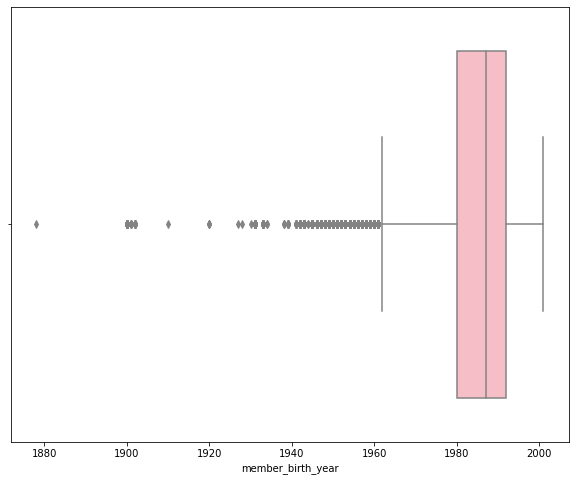

In [21]:
plt.figure(figsize=[10,8])

sb.boxplot(data = df_ford, x = 'member_birth_year',color='lightpink');

In [22]:
df_ford['member_birth_year'].max()


2001.0

In [23]:
df_ford['member_birth_year'].min()

1878.0

In [24]:
# calculate the ( IQR ) to used it to find The outliers :
def outliers(df_ford, f):
    Q1= df_ford[f].quantile(0.25)
    Q3 = df_ford[f].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(df_ford, "member_birth_year")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  2010.0
Lower Whisker:  1962.0


In [25]:
# remove outliers any year less than 1962.0
df_ford = df_ford[df_ford['member_birth_year'] >= 1962.0]

In [26]:
df_ford['member_birth_year'].max()

2001.0

In [27]:
df_ford['member_birth_year'].min()

1962.0

In [28]:
# check null values :
df_ford['member_birth_year'].isnull().sum()

0

In [29]:
# convert the type :
df_ford['member_birth_year'].astype(int)

0         1984
2         1972
3         1989
4         1974
6         1983
          ... 
183407    1996
183408    1984
183409    1990
183410    1988
183411    1989
Name: member_birth_year, Length: 169365, dtype: int32

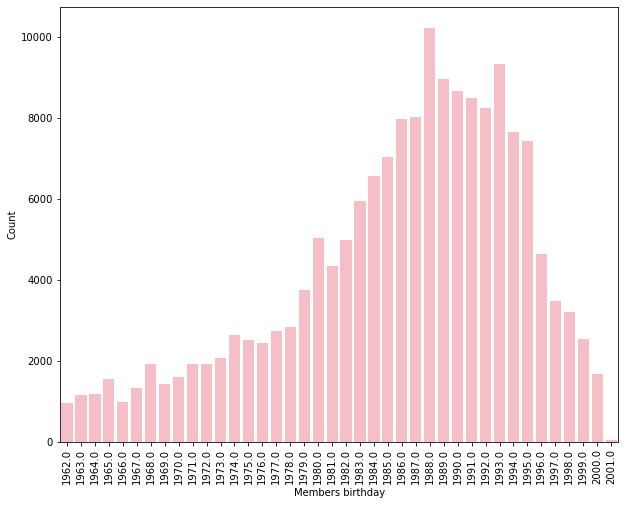

In [30]:

sb.countplot(data=df_ford, x='member_birth_year', color='lightpink');
plt.xticks(rotation=90);
plt.xlabel('Members birthday');
plt.ylabel('Count');
plt.gcf().set_size_inches(10,8)


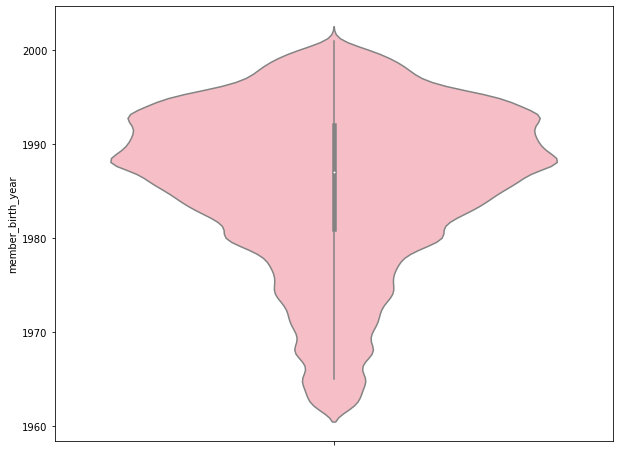

In [31]:
plt.figure(figsize=[10,8])

sb.violinplot(data = df_ford, y = 'member_birth_year', color='lightpink');

> - The plot shows that the most members activited are  born in 2001, and the members least activity are there  born in 1962.

#### - member_gender :

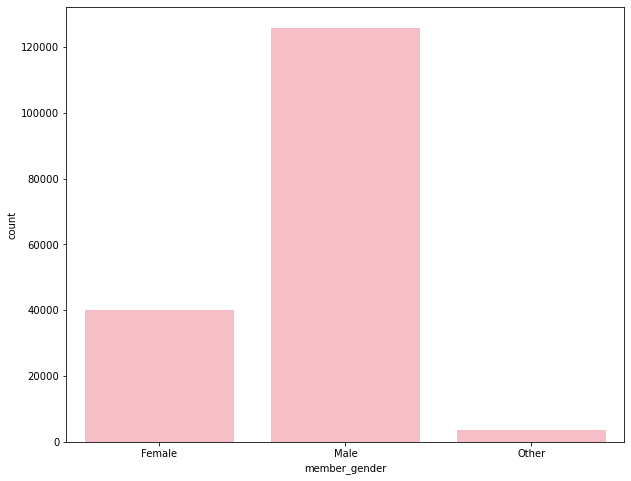

In [32]:
plt.figure(figsize=[10,8])

sb.countplot(data = df_ford, x = 'member_gender', color = 'lightpink');

> - The plot shows the graet majority are ( Male ) and the least are ( Female ) .

#### - user_type :

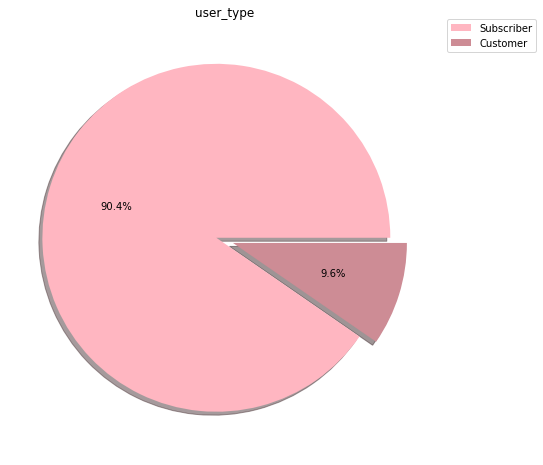

In [33]:
plt.figure(figsize=[10,8])
colors = ['#FFB6C1','#CD8C95']
data = df_ford["user_type"].value_counts()
ax = data.plot(kind="pie", autopct='%1.1f%%', shadow=True, explode=[0.05, 0.05], colors=colors, legend=True, title='user_type', ylabel='', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

>- The plot shows the most of user type is suscribed and the custumers are the least .

#### - bike_share_for_all_trip :

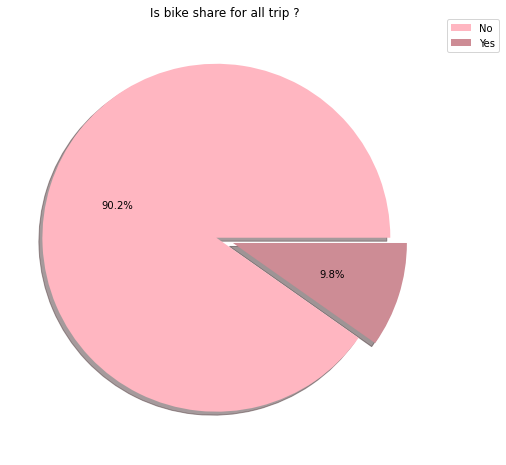

In [34]:

plt.figure(figsize=[10,8])
colors = ['#FFB6C1','#CD8C95']
data = df_ford["bike_share_for_all_trip"].value_counts()
ax = data.plot(kind="pie", autopct='%1.1f%%', shadow=True, explode=[0.05, 0.05], colors=colors, legend=True, title='Is bike share for all trip ?', ylabel='', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

> - It is clear from the plot that most mambers don't always use their bikes in all trip .

#### 2- Length of duration trip ( duration_minutes) :

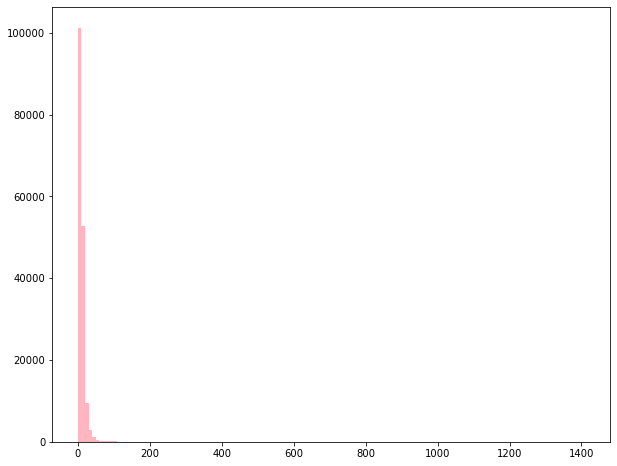

In [35]:
binsize = 10
bins = np.arange(0, df_ford['duration_minutes'].max()+binsize, binsize)

plt.figure(figsize=[10, 8])

plt.hist(data = df_ford, x = 'duration_minutes', bins=bins, color='lightpink');

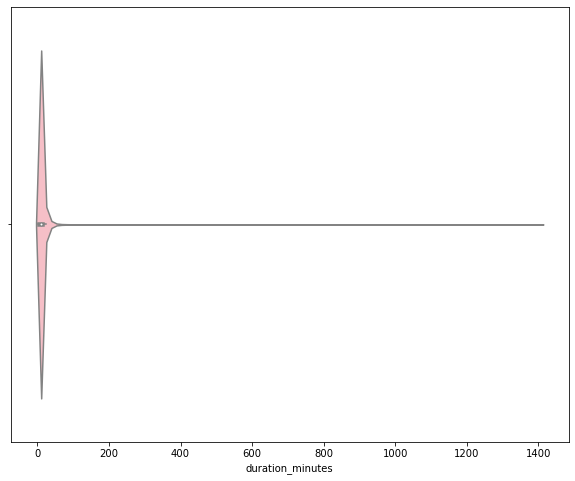

In [36]:
plt.figure(figsize=[10,8])

sb.violinplot(data = df_ford, x = 'duration_minutes', color='lightpink');

In [37]:
# check :
df_ford['duration_minutes'].describe()

count    169365.000000
mean         11.722350
std          27.721016
min           1.016667
25%           5.366667
50%           8.483333
75%          13.100000
max        1409.133333
Name: duration_minutes, dtype: float64

In [38]:
# calculate the ( IQR ) to used it to find The outliers :
def outliers(df_ford, f):
    Q1= df_ford[f].quantile(0.25)
    Q3 = df_ford[f].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(df_ford, "duration_minutes")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  24.7
Lower Whisker:  -6.233333333333333


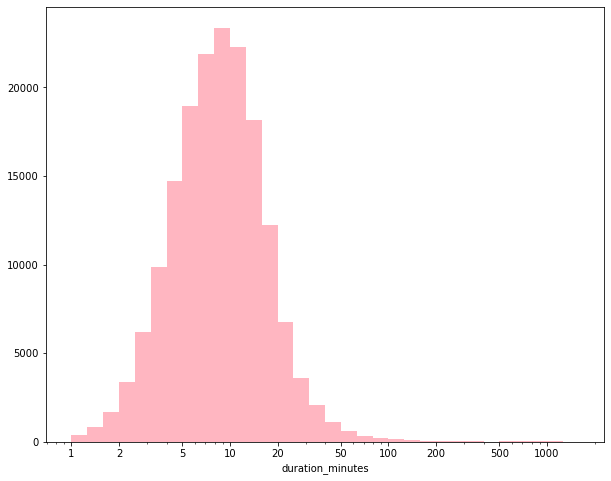

In [39]:
# i will use the logarithmic scale transformation because i see alotoutliers values  and long tail in the data :
plt.figure(figsize=[10,8])
bin_edges = 10 ** np.arange(0.0, np.log10(df_ford.duration_minutes.max())+0.1, 0.1)
plt.hist(data = df_ford, x = 'duration_minutes', bins = bin_edges, color='lightpink')
plt.xscale('log')
tick_locs = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
plt.xticks(tick_locs, tick_locs)
plt.xlabel('duration_minutes');

In [40]:
# remove outliers value ( long tail) more than 120 :
df_ford = df_ford[df_ford['duration_minutes'] <= 120]

In [41]:
# check :
df_ford['duration_minutes'].describe()

count    168839.000000
mean         10.622445
std           8.954063
min           1.016667
25%           5.366667
50%           8.466667
75%          13.050000
max         119.566667
Name: duration_minutes, dtype: float64

> - We note that the maximum duration of riding the bike is 120 minutes, which is equivalent to 2 hours  and the minimum duration is for 1 minute !    , may be he didn't in good moode :)

#### 3- Counts of times rides bike : start_time & end_time

In [42]:
# create new column have (start_hour) from (start_time) :
df_ford['start_hour'] = df_ford.start_time.dt.hour

# create new column have (end_hour) from (end_time) :
df_ford['end_hour'] = df_ford.end_time.dt.hour

# check :
df_ford.dtypes

start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                          object
member_birth_year                 float64
member_gender                    category
bike_share_for_all_trip            object
duration_minutes                  float64
start_hour                          int64
end_hour                            int64
dtype: object

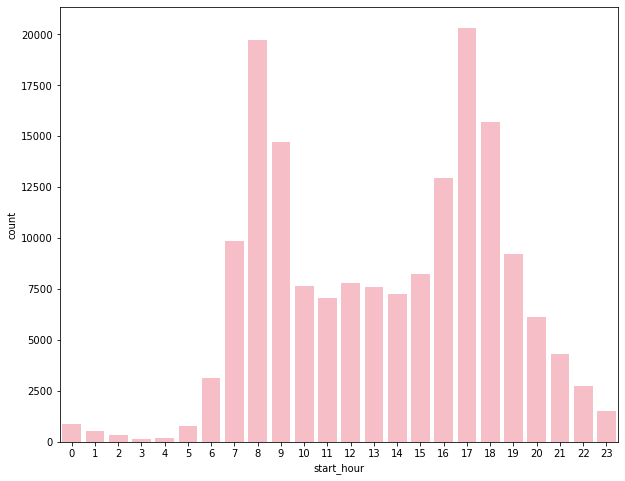

In [43]:
plt.figure(figsize=[10,8])
sb.countplot(data = df_ford, x = 'start_hour', color = 'lightpink');

> - The plot shows the most rides between  7 AM to 19 PM .

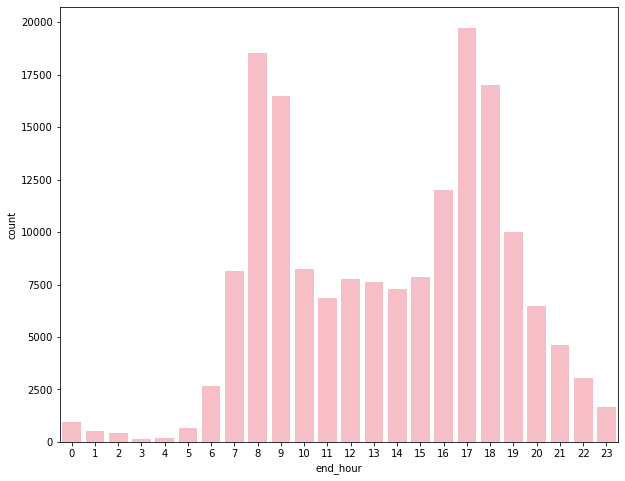

In [44]:
plt.figure(figsize=[10,8])
sb.countplot(data = df_ford, x = 'end_hour', color = 'lightpink');

> - The plots look like (start_hour) plot it shows the most rides between 7 AM to 19 PM AGAIN ! ; thats mean maybe the most working days start in 7 AM to 19 PM .

#### 4- Distance between start, end station coordinates :

> i will Calculate the longitude and latitude of the start& end  station , then Calculate the distance between the start station point and the end station point 

In [45]:
# import geopy library :
from geopy.distance import geodesic

In [46]:
# calculate the distance between start& end  station in new column (trip_distance) :
def distance(row):
    return geodesic((row.start_station_latitude, row.start_station_longitude),(row.end_station_latitude, row.end_station_longitude)).miles
df_ford['trip_distance']= df_ford.apply(lambda r: distance(r), axis=1)

C:\Users\nooon\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trip_distance', ylabel='Density'>

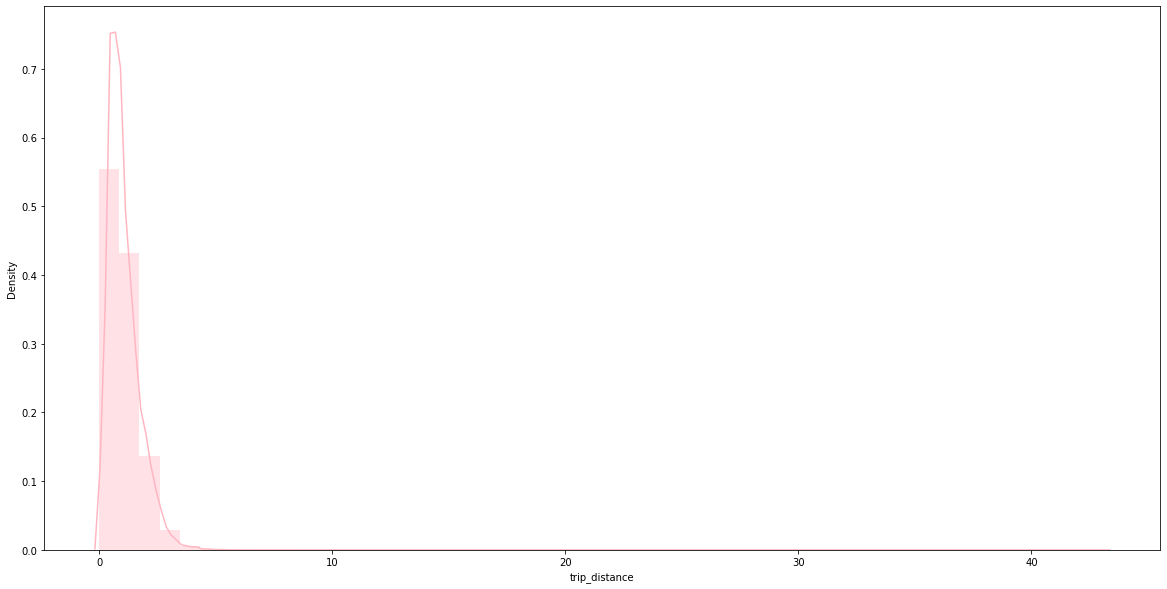

In [47]:
plt.figure(figsize=[20,10])

sb.distplot(df_ford['trip_distance'],color='lightpink')

In [48]:
df_ford['trip_distance'].value_counts()

0.000000    3236
0.645017     569
0.837340     491
1.346881     477
0.877847     464
            ... 
0.558917       1
1.896026       1
1.393432       1
2.068972       1
4.220974       1
Name: trip_distance, Length: 13607, dtype: int64

In [49]:
df_ford['trip_distance'].describe()

count    168839.000000
mean          1.050358
std           0.678277
min           0.000000
25%           0.569054
50%           0.888503
75%           1.379629
max          43.164157
Name: trip_distance, dtype: float64

> - The plot shows the greater distance is (4.22) miles , the least distance is (0.645) miles  AND we can see ( 3236 ) members dosen't rides bikes !

In [50]:
# now i will removed columns no need 
df_ford=df_ford.drop(['start_time','end_time','start_station_id','start_station_name','start_station_latitude','start_station_longitude','end_station_id','end_station_name','end_station_latitude','end_station_longitude'],axis=1)

In [51]:
#check
df_ford.head()

,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minutes,start_hour,end_hour,trip_distance
4,4898,Subscriber,1974.0,Male,Yes,26.416667,23,0,1.498758
6,3803,Subscriber,1983.0,Female,No,19.116667,23,0,1.260963
7,6329,Subscriber,1989.0,Male,No,26.916667,23,0,2.812452
8,6548,Subscriber,1988.0,Other,No,26.166667,23,0,2.812452
9,6488,Subscriber,1992.0,Male,No,17.483333,23,0,2.274381


> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> 
- The ages of most members ranged between (20) and (60).

- Most of the members are men and the number of women was less than half the number of men.

- There are two types of users, (Subscriber) by (90.4%) and (Customer) by (9.6%).

- It's worth noting that 90% of members dosn't share their bikes for most of their rides.

- The start and end times of the trip ranged between( 7 am ) & ( 5 pm ) and most trips didn't exceed ( 2 hours) ,  the normal rate is ( 1 hour/  trip ) . 

- The average distance trip by a member is approximately 75%  :(4.22 miles ~ 7 km) AND approximately 25% : (0.56 miles ~ 1 km).


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

 >
 
- I calculated the distance of the trip between the start point to the end point by calculating the latitude and longitude for each of them and I created a new column named (distance_trip).

- I converted the (duration_sec) column to the ( duration_minutes) column.

- I extracted the value of ( hour ) from ( start_time ) & (end_time ) column so that I can use it to discover relationships later.

- I converted the column ( start_time ) & (end_time ) from type (object) to type (to_datetime) to be more used.

- I found outliers in the (member_birht_year) column ,  Some outliers had an age of 140 years, which is unusual ! 
I also found that it had an unusual distribution ; so I calculated (iqr) and through it I removed the outliers.

- Also I found some outliers in the (duration_minutes) column , Some outliers contained (24 hours) and this is wrong !  Nobody can drive for 24 hours!  
I also found that it had an unusual distribution ; so I calculated (iqr) and through it I removed the outliers.


- I deleted the columns that I will not need in the analysis.

- I kept the columns I needed in the analysis .


-----------------

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [52]:
df_ford.sample(5)

,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minutes,start_hour,end_hour,trip_distance
70078,3337,Subscriber,1988.0,Male,No,9.133333,18,18,1.219403
104766,5149,Subscriber,1990.0,Male,No,6.700000,8,8,0.769713
57684,6318,Subscriber,1996.0,Female,No,9.883333,8,8,0.877847
58208,6291,Subscriber,1982.0,Male,No,10.566667,7,7,1.345977
18759,5218,Subscriber,1990.0,Male,No,5.400000,18,18,0.958886


In [53]:
df_ford.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168839 entries, 4 to 183411
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   bike_id                  168839 non-null  object  
 1   user_type                168839 non-null  object  
 2   member_birth_year        168839 non-null  float64 
 3   member_gender            168839 non-null  category
 4   bike_share_for_all_trip  168839 non-null  object  
 5   duration_minutes         168839 non-null  float64 
 6   start_hour               168839 non-null  int64   
 7   end_hour                 168839 non-null  int64   
 8   trip_distance            168839 non-null  float64 
dtypes: category(1), float64(3), int64(2), object(3)
memory usage: 15.8+ MB


 >
 - quantitative  variables : 
- [member_birth_year] 
- [duration_minutes] 
- [start_hour] 
- [end_hour] 
- [trip_distance]
 - qualitative varibles : 
- [user_type] 
- [member_gender] 
- [bike_share_for_all_trip]

#### quantitative VS. quantitative :
> - member_birth_year VS. duration_minutes :



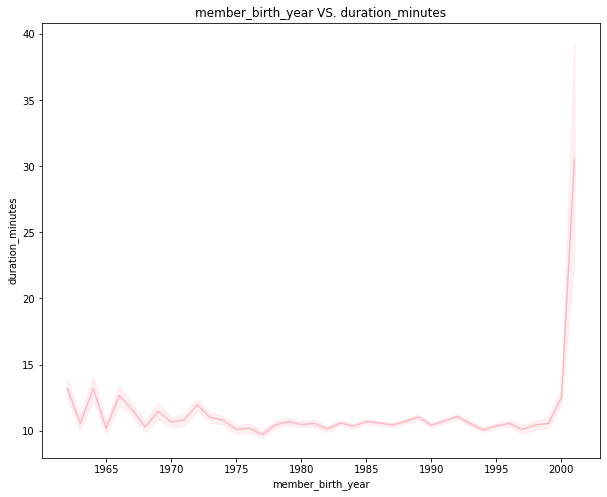

In [54]:

plt.figure(figsize=[10,8])
sb.lineplot(x=df_ford.member_birth_year, y=df_ford.duration_minutes, color='lightpink')
plt.title('member_birth_year VS. duration_minutes')
plt.show()

#### -  The plot shows the members  birth 2000 year have highest duration minutes of trip more than all years .

> - member_birth_year VS. trip_distance :


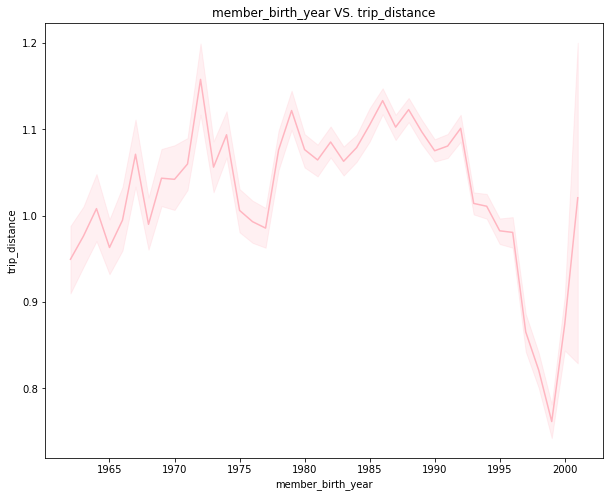

In [55]:
plt.figure(figsize=[10,8])
sb.lineplot(x=df_ford.member_birth_year, y=df_ford.trip_distance, color='lightpink')
plt.title('member_birth_year VS. trip_distance')
plt.show()

#### - The plot shows that the distance rides on the trips varies between members of all ages .

####  qualitative VS. quantitative :

> - member_gender VS. duration_minutes :


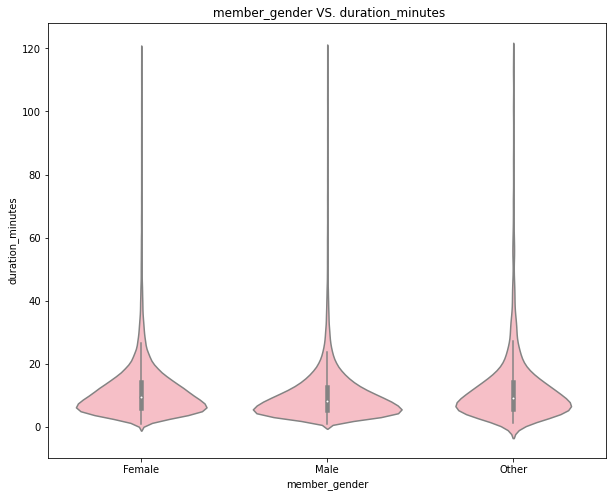

In [56]:
plt.figure(figsize=[10,8])
sb.violinplot(x=df_ford.member_gender, y=df_ford.duration_minutes,color='lightpink')
plt.title(' member_gender VS. duration_minutes')
plt.show()


#### - The plot shows the Male duration minutes higher more than Female  and Others .

> - user_type VS. duration_minutes :

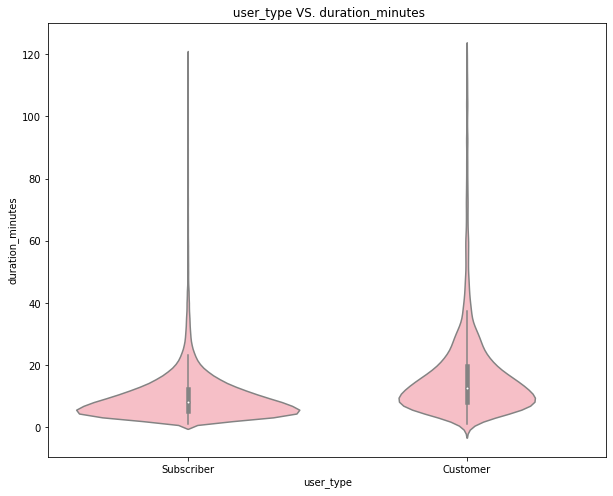

In [57]:
plt.figure(figsize=[10,8])
sb.violinplot(x=df_ford.user_type, y=df_ford.duration_minutes,color='lightpink')
plt.title(' user_type VS. duration_minutes')
plt.show()


#### - The plot shows that members of the type ( Subscriber) rides bikes more and have more of  duration minutes .

> - member_gender VS. trip_distance :


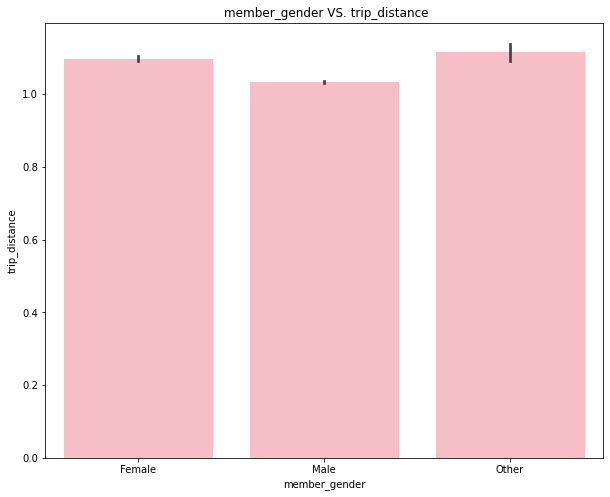

In [58]:
plt.figure(figsize=[10,8])
sb.barplot(data=df_ford, x='member_gender', y='trip_distance', color = 'lightpink');
plt.title(' member_gender VS. trip_distance')
plt.show()

#### - It seems that the gender( others )  rides the highest distance in the trips, then the ( females) and then the ( males ) , respectively, the difference between them is very simple.

> -  user_type VS. trip_distance :

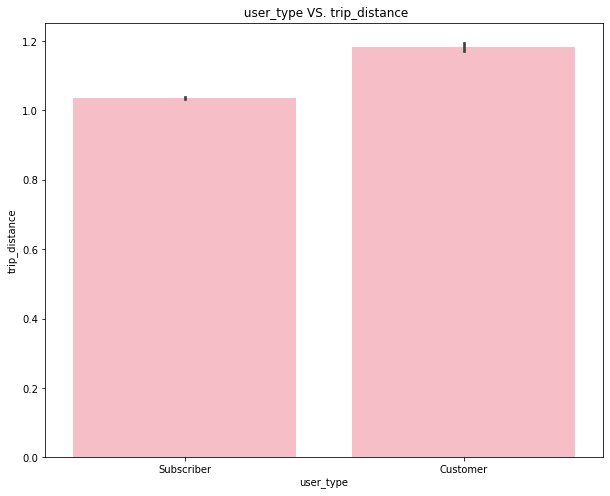

In [59]:
plt.figure(figsize=[10,8])
sb.barplot(x=df_ford.user_type, y=df_ford.trip_distance,color='lightpink')
plt.title(' user_type VS. trip_distance')
plt.show()


#### - The plot shows the type of user ( Customer) rides distances more than ( Subscriber) .

> - user_type VS. start_hour &   user_type VS. end_hour :

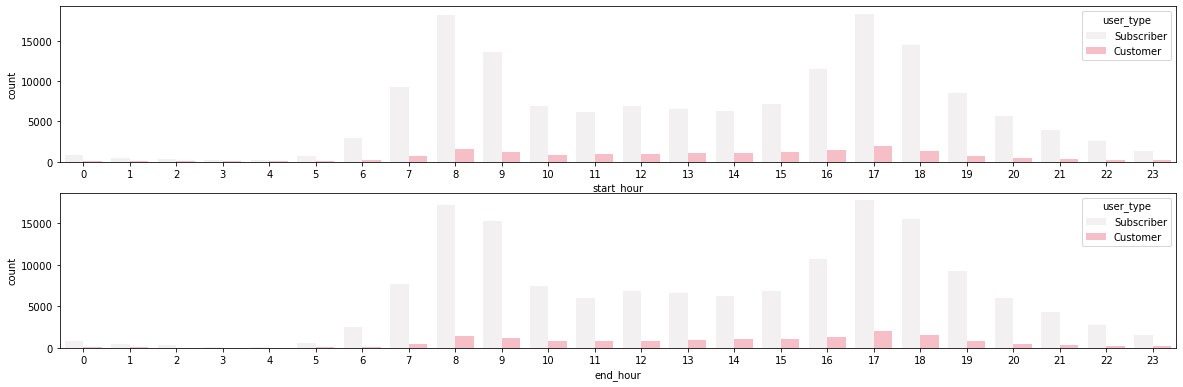

In [60]:
plt.figure(figsize = [20, 20]);


plt.subplot(6, 1, 1);
sb.countplot(data = df_ford, x = 'start_hour', hue = 'user_type', color = 'lightpink');

ax= plt.subplot(6, 1, 2);
sb.countplot(data = df_ford, x = 'end_hour', hue = 'user_type', color = 'lightpink');



#### - we can see the times of the start hours and end hours of the (subscriber) type are higher than the times of the start and end hours of the (customer) type, the start hour and the end hour are close together .

> -  member_gender  VS. start_hour &   member_gender  VS. end_hour :

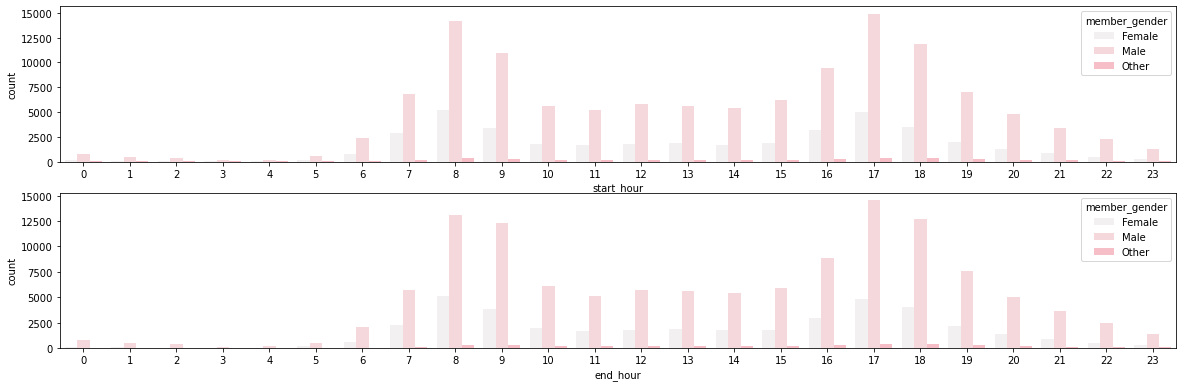

In [61]:
plt.figure(figsize = [20, 20]);


plt.subplot(6, 1, 1);
sb.countplot(data = df_ford, x = 'start_hour', hue = 'member_gender', color = 'lightpink');

ax= plt.subplot(6, 1, 2);
sb.countplot(data = df_ford, x = 'end_hour', hue = 'member_gender', color = 'lightpink');



#### - We can see that the start hour and the end hour are close together in all genders , and  the start hours and end hours of the (other) gender are higher than male and female .

#### qualitative VS. qualitative :
> - user_type VS. bike_share_for_all_trip :


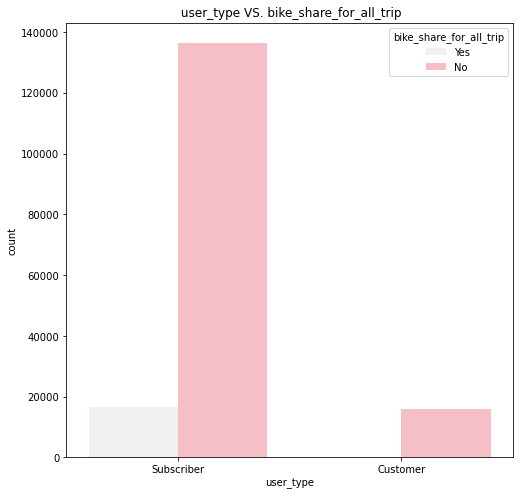

In [62]:
plt.figure(figsize=[8,8])
sb.countplot(data = df_ford, x = 'user_type', hue = 'bike_share_for_all_trip', color = 'lightpink');
plt.title(' user_type VS. bike_share_for_all_trip')
plt.show()


#### - We can see that not all users  use bikes on all their trips .

> - member_gender VS. user_type :


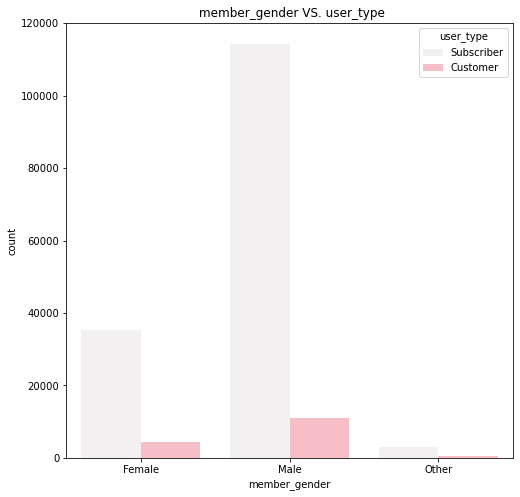

In [63]:
plt.figure(figsize=[8,8])
sb.countplot(data = df_ford, x = 'member_gender', hue = 'user_type', color = 'lightpink');
plt.title(' member_gender VS. user_type')
plt.show()

#### - The plot shows the most of subscriber type users from male than female and the most of customer type users from male too !

> - member_gender VS. bike_share_for_all_trip :

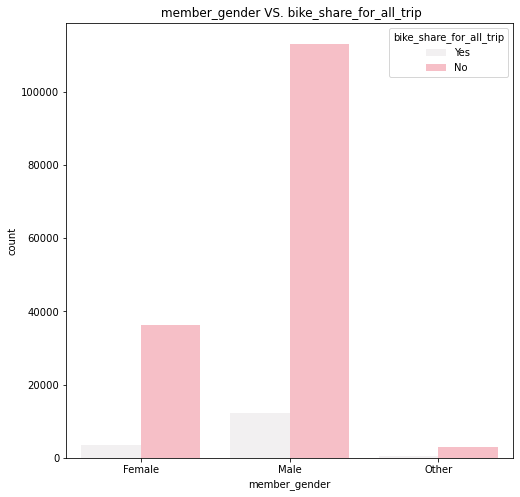

In [64]:
plt.figure(figsize=[8,8])
sb.countplot(data = df_ford, x = 'member_gender', hue = 'bike_share_for_all_trip', color = 'lightpink');
plt.title(' member_gender VS. bike_share_for_all_trip')
plt.show()

#### - The plot shows the (males) are sharing the bikes  for all trip more than (females) and ( others) .

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>
- Members birth in 2000 years  or more have trips of longer duration, which may reach more than an hour .
- The distance traveled on trips for all ages varies .

- Members of the subscriber type spend more time bikes .
- Members of the Customer type rides more distance trip .
- Members of suscriber rides between 7 am and 7 pm .
- Members of customer rides between 8 am and 8 pm .
- Members of subscriber more than sahre the bikes in trips .

- All Genders have close travel distances .
- All of Genders have close of rides time between 7 am and 7 pm and the maximum times are between 8am and 5pm .
- The males take more time in bikes .
- The Males in the (subscriber) &(customer) types  more than the Females , females are less than half of count males in both types .
- The Males more than sahre the bikes in trips .


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

NO

------------------------------

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [65]:
df_ford.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168839 entries, 4 to 183411
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   bike_id                  168839 non-null  object  
 1   user_type                168839 non-null  object  
 2   member_birth_year        168839 non-null  float64 
 3   member_gender            168839 non-null  category
 4   bike_share_for_all_trip  168839 non-null  object  
 5   duration_minutes         168839 non-null  float64 
 6   start_hour               168839 non-null  int64   
 7   end_hour                 168839 non-null  int64   
 8   trip_distance            168839 non-null  float64 
dtypes: category(1), float64(3), int64(2), object(3)
memory usage: 15.8+ MB


> - The relatiomship between start hour and end hour of each user types :

C:\Users\nooon\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1152x576 with 0 Axes>

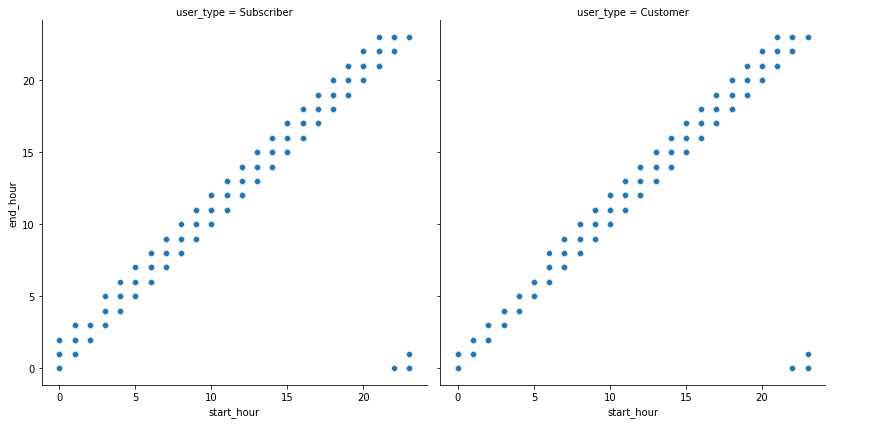

In [66]:
plt.figure(figsize=(16,8))
colors=['pink','purple']
g = sb.FacetGrid(data = df_ford, col = 'user_type',margin_titles=True,size=6,palette = 'dark')
g.map(sb.scatterplot, 'start_hour', 'end_hour')
g.add_legend()


#### - we can see the corelation between start and end hours is positive .

> - Duration minutes of User types for all members gender :

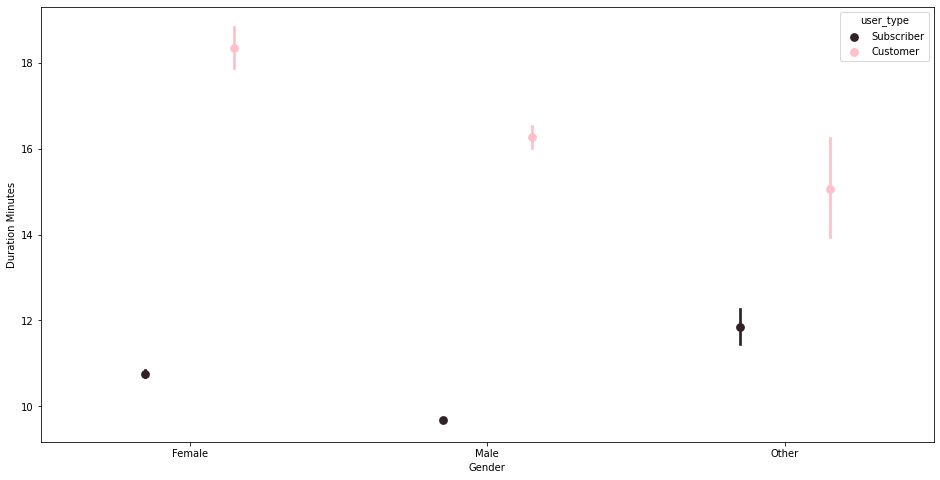

In [67]:
plt.figure(figsize=(16,8))
colors=['pink','purple']
sb.pointplot(data=df_ford, x='member_gender', y='duration_minutes', hue='user_type', dodge=0.3, linestyles="", color = 'pink');
plt.xlabel('Gender');
plt.ylabel('Duration Minutes');


#### - we can see the suscriber type have short times of duration and on the other hand we can see the customer type have relatively longer times of duration .

> - Trip distances of User types for all members by year of birth :

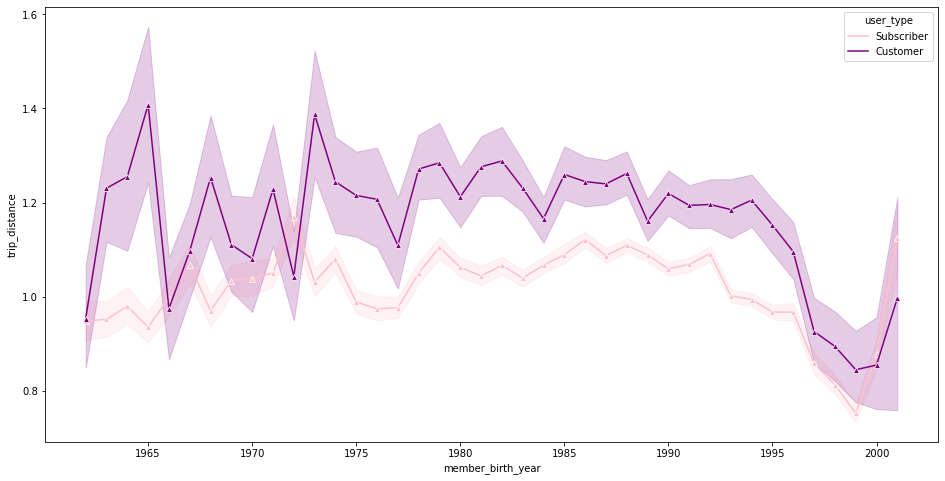

In [68]:
plt.figure(figsize=(16,8))
colors=['pink','purple']
sb.lineplot(data = df_ford, x='member_birth_year', y='trip_distance', hue='user_type', marker='^',palette=colors)
plt.ylabel('trip_distance');

#### - we can see the trip distances of all user types are Similar over the almost years.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>
- In all types of users, all start and end hours are equal; Because the flight duration does not exceed an hour.
- in the subscriber type we see times of short duration of trips, and in the type of customer we see times of longer duration of trips; This means that the (common) type is the member that is more frequent and regular.
- In the type (customer), we note that the longest distance trip are higher in the members born in 1964 and  in 1973  then gradually decreasing to 1998 .
- In the type (subscriber) , we note that the longest distances trip are higher in the members born in (1967 , 1972 , 1979) .

### Were there any interesting or surprising interactions between features?

> Yes .
- The difference between the number of male and female members is large, and the number of female members is less than half the number of male members!
- The type of "subscriber" is the most member in Ford GoBike .
- The trip distances of the older members greater than those of the younger members, which is amazing!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [69]:
# save df_ford :
df_ford.to_csv('master_clean_bike_system.csv', index=False)

---------------------------------------------